<a href="https://colab.research.google.com/github/ibader85/PredictiveAnalytics/blob/main/16_Classification_Trees_Using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

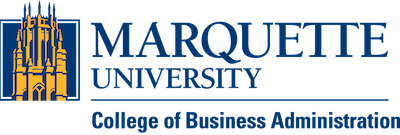

# BUAN 3065: Unlocking Business Insights with Predictive Analytics
# Classification Trees Using R

Instructor: Dr. Badar Al Lawati

Hayden Sellar, the bank
manager of Sunnyville Bank, wants to use historical data from 500
bank customers to develop a classification model for determining
whether or not new bank customers will respond to a HELOC offer.


He also thinks that Sunnyville Bank is not targeting the right
customers when marketing its HELOC products and hopes that the
classification model will offer actionable insights for his company.


Hayden plans to assess the performance of the model and then classify
20 new bank customers as likely or unlikely to respond to a HELOC
offer

The most popular algorithms for building decision trees in R can
be found in the rpart package.

As discussed earlier, R implements a
k-fold cross-validation process for pruning decision trees using twoway
partitioning (i.e., only training and validation data).

In [5]:
# Import the excel file into Colab

install.packages("readxl")
library(readxl)

myData <- read_excel("/content/HELOC.xlsx", sheet = "HELOC_Data")
myData

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Age,Sex,Income,HELOC
<dbl>,<chr>,<dbl>,<dbl>
30,Female,101000,0
25,Male,86000,0
20,Male,50000,0
26,Male,58000,0
18,Female,93000,0
38,Male,153000,0
61,Male,71000,1
27,Male,102000,0
38,Male,33000,1


In [9]:
# Install necessary packages

install.packages("caret")
install.packages("gains")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("pROC")

library(caret)
library(gains)
library(rpart)
library(rpart.plot)
library(pROC)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: lattice

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




For constructing a classification tree model, R requires that the
target variable, HELOC, be a factor (categorical) variable.

We
use the as.factor command to convert the HELOC variable into
a categorical type.

In [10]:
myData$HELOC <- as.factor(myData$HELOC)

We use the set.seed command to set the random seed to 1, thus
generating the same partitions as in this example.

We use the
createDataPartition function to partition the data into training
(70%) and validation (30%) data sets.

In [11]:
set.seed(1)
myIndex <- createDataPartition(myData$HELOC, p=0.7, list = FALSE)
trainSet <- myData[myIndex,]
validationSet <- myData[-myIndex,]

Please note that if you are using a different version of R or caret
package, you may need to use the following alternate code to
assign observations to trainSet:

In [12]:
# trainSet <- myData[c(myIndex),]

We use the rpart function to generate the default classification
tree, default_tree.

Within the rpart function, we specify the
model structure, data source, and method.

The method option is
set to “class” for developing a classification tree.

To view the
details about the default tree, use the summary function.

Because
R uses the k-fold cross-validation method for pruning the tree, to
ensure consistency of the cross-validation results, we use the
set.seed function to set a random seed of 1.

In [14]:
set.seed(1)
default_tree <- rpart(HELOC ~ ., data=trainSet, method = "class")
summary(default_tree)

Call:
rpart(formula = HELOC ~ ., data = trainSet, method = "class")
  n= 350 

          CP nsplit rel error    xerror       xstd
1 0.17582418      0 1.0000000 1.0000000 0.09017687
2 0.02197802      2 0.6483516 0.7582418 0.08179039
3 0.01098901      6 0.5494505 0.8461538 0.08516306
4 0.01000000      7 0.5384615 0.8241758 0.08435709

Variable importance
   Sex    Age Income 
    54     24     22 

Node number 1: 350 observations,    complexity param=0.1758242
  predicted class=0  expected loss=0.26  P(node) =1
    class counts:   259    91
   probabilities: 0.740 0.260 
  left son=2 (194 obs) right son=3 (156 obs)
  Primary splits:
      Sex    splits as  LR,         improve=34.177360, (0 missing)
      Age    < 34.5   to the left,  improve=12.603390, (0 missing)
      Income < 144500 to the left,  improve= 3.129123, (0 missing)
  Surrogate splits:
      Income < 131500 to the left,  agree=0.583, adj=0.064, (0 split)
      Age    < 33.5   to the left,  agree=0.571, adj=0.038, (0 split)


To view the classification tree visually, use the prp function.

The
type option is set equal to 1 so that all nodes except the leaf
nodes are labeled in the tree diagram.

The extra option is set
equal to 1 so that the number of observations that fall into each
node is displayed.

The under option is set equal to TRUE to put
the number of cases under each decision node in the diagram.

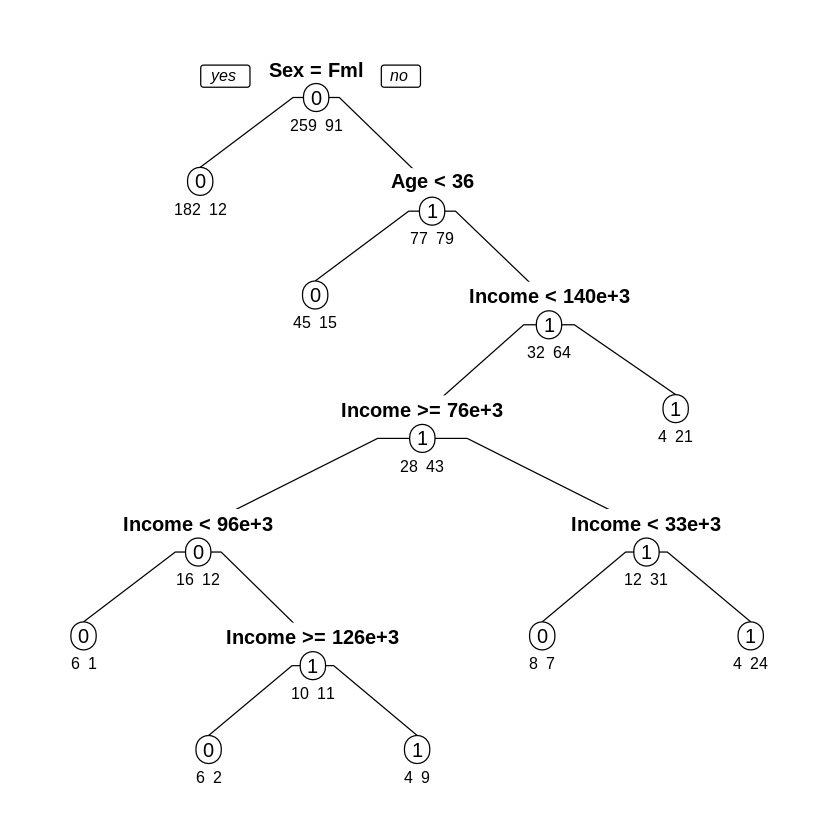

In [15]:
prp(default_tree, type=1, extra=1, under = TRUE)

Note that R presents decision trees in a slightly
different format from the way a conventional decision tree

The root node provides
information about how to interpret the tree.

For example, the root node shows that if Sex is “Female,”
then go to the left branch; otherwise go to the right branch.

The
subsequent decision nodes follow the same format.

For example,
the second decision node suggests that if Age is less than 25,
then go to the left branch; otherwise go to the right branch.

------------------------

How is the number of splits determined in the default
classification tree? The rpart function uses the complexity
parameter (cp) to determine when to stop growing the tree.

If
the cost of adding another split to the tree exceeds the value of
cp, then the tree growth will not continue.

The default cp value
for the rpart function is 0.01. However, in most cases, it is very
difficult to know which cp value will produce the bestperforming
tree beforehand.

Therefore, a common practice is to
grow the full tree and then prune it to a less-complex tree based
on the classification errors produced by a built-in crossvalidation
process of the rpart function.

By identifying the value
of cp associated with the smallest cross-validated classification
error, we can create the minimum error tree.

Alternatively, we
can produce the best-pruned tree, which is the smallest tree  
an error rate that is within one standard error of the minimum
error rate.

Next, we will demonstrate the pruning process to
optimize the complexity of the tree.

------------------------------------
We first grow the full tree by using the rpart function. We set the
options cp equal to 0, minsplit equal to 2, and minbucket equal to
1

The minsplit option specifies the minimum number of
observations in the parent node that can be split further, and the
minbucket option specifies the minimum number of observations
that are allowed in the leaf node.

These settings ensure that the
largest possible tree will be produced. We plot the full tree using
the prp function.

Again, to ensure consistency of the crossvalidation
results, we specify a random seed of 1 using the
set.seed function.

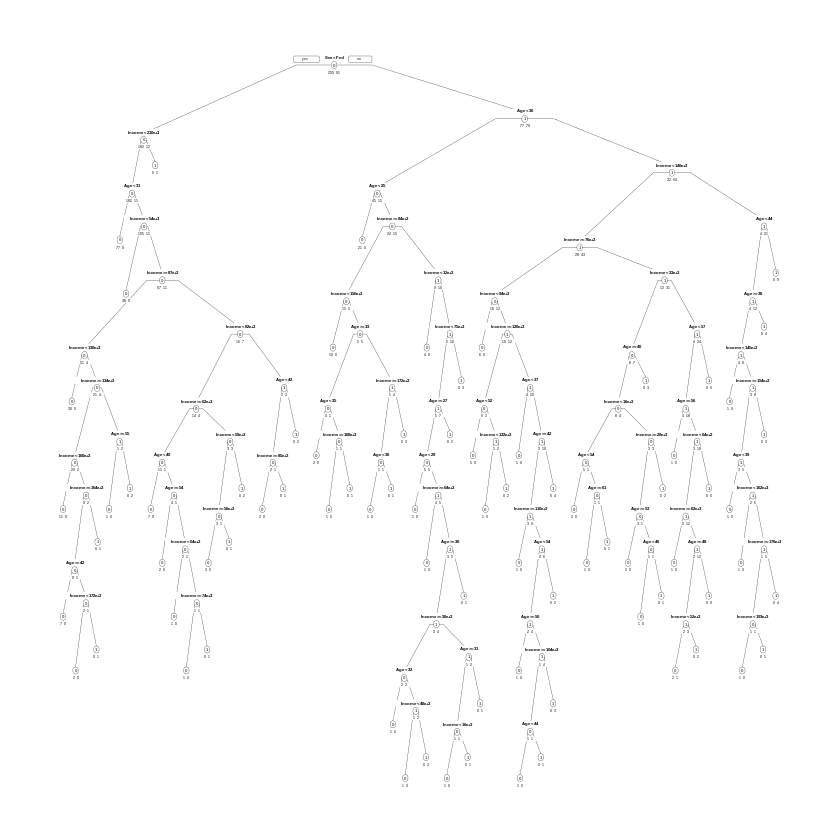

In [18]:
set.seed(1)
full_tree <- rpart(HELOC ~ ., data = trainSet, method = "class", cp=0, minsplit=2, minbucket=1)
prp(full_tree, type=1, extra=1, under = TRUE)

To identify the value of cp that is associated with the smallest
cross-validated classification error, we use the printcp function to
display the complexity parameter table.

In [19]:
printcp(full_tree)

# The nsplit column shows the number of splits for each tree. The number of
# leaf nodes for each tree can be calculated using nsplit + 1. For
# example, the last tree has 82 splits, so it has 83 leaf nodes.


Classification tree:
rpart(formula = HELOC ~ ., data = trainSet, method = "class", 
    cp = 0, minsplit = 2, minbucket = 1)

Variables actually used in tree construction:
[1] Age    Income Sex   

Root node error: 91/350 = 0.26

n= 350 

          CP nsplit rel error  xerror     xstd
1  0.1758242      0  1.000000 1.00000 0.090177
2  0.0219780      2  0.648352 0.75824 0.081790
3  0.0183150      8  0.494505 0.84615 0.085163
4  0.0164835     11  0.439560 0.82418 0.084357
5  0.0109890     13  0.406593 0.80220 0.083527
6  0.0068681     19  0.340659 0.79121 0.083102
7  0.0054945     31  0.252747 0.84615 0.085163
8  0.0036630     65  0.065934 0.98901 0.089853
9  0.0027473     73  0.021978 1.02198 0.090810
10 0.0000000     77  0.010989 1.02198 0.090810


The rel error column shows the fraction of misclassified cases
for each tree relative to the fraction of misclassified cases in the
root node if all cases are classified into the predominant class.


As you can see, the last tree has a relative error of 0 because it is
the fully grown tree whose leaf nodes only contain cases that
belong to the same class; therefore, there are no misclassified
cases.


The xerror column shows the cross-validation errors associated
with each candidate tree.

Each error is measured relative to the
cross-validation error of the root node.

It is the recommended
measure for identifying the tree that can potentially perform well
on new data sets.

As you can see from the xerror column, the
cross-validation errors decrease initially as the classification tree becomes more complex and then increase after a certain point.


This is common and indicative of the overfitting problems with
complex tree models. The fourth tree, with six splits, has the
lowest cross-validation error (0.83516); therefore, it is the
minimum error tree.


The xstd column can be used to identify the best-pruned tree,
which is the smallest tree with an error that is within one
standard error of the minimum error tree. In this case, no
simpler tree has a cross-validation error that meets this criterion.


In other words, no simpler tree has a relative cross-validation
error that is less than 0.919923 (= 0.83516 + 0.084763).


Therefore, the best-pruned tree and minimum error tree are the
same tree.

However, in many cases, you may find that the bestpruned
and minimum error trees are two different trees.

-----------------------------------
In this case, the third tree,
with five splits, has a relative cross-validation error (0.87912)
that is within one standard error of the minimum error (0.81319 + 0.083945 = 0.897135); hence, the third tree, with five splits, is
the best-pruned tree.

Please note that while the third and fourth
trees have the same xerror values, the third tree is selected as the
best-pruned tree because it is the simpler of the two.

We use the prune function to create the pruned tree by using the
cp value associated with the fourth tree.

Please note that the cp
values provided in R results are rounded to seven digits after the
decimal points.

To ensure that we do not use a cp value that is
less than the actual cp value, which can cause R to prune the
tree to the next larger tree, we use a cp value that is slightly
larger than the cp value displayed in the table but lower than the
cp value for the next smaller tree.

In this case, we will use
0.0164836, a number that is slightly larger than the cp number
associated with the fourth tree (0.0164835).

We display the
pruned tree using the prp function.

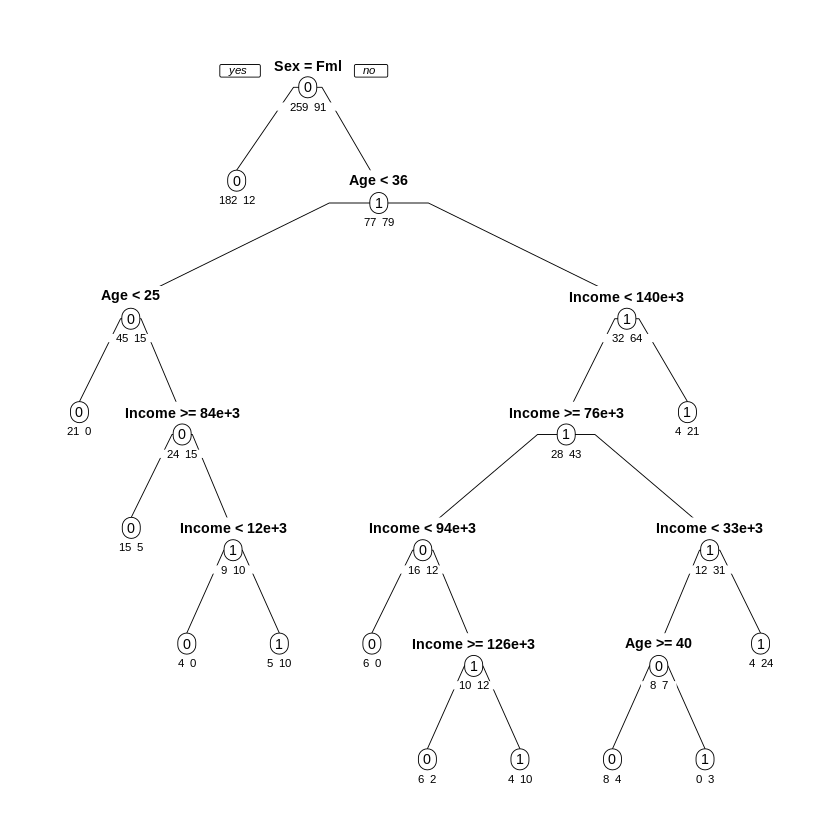

In [20]:
pruned_tree <- prune(full_tree, cp=0.0164836)
prp(pruned_tree, type=1, extra=1, under = TRUE)

Note that this is a much simpler tree with
fewer branches, compared to the default tree earier



In [22]:
# We predict the class memberships of the observations in the
# validation data set using the predict function. We set the type
# option equal to “class” so that the class membership is produced
# instead of its probability.

predicted_class <- predict(pruned_tree, validationSet, type = "class")

The confusion matrix can be created by comparing the predicted
class memberships and actual class memberships of the
validation data set.

We use the confusionMatrix function to
produce the confusion matrix and various performance
measures.

The positive = “1” option specifies 1 as the target class
(respond to a HELOC offer).

In [23]:
confusionMatrix(predicted_class, validationSet$HELOC, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 98 18
         1 13 21
                                          
               Accuracy : 0.7933          
                 95% CI : (0.7197, 0.8551)
    No Information Rate : 0.74            
    P-Value [Acc > NIR] : 0.07892         
                                          
                  Kappa : 0.4396          
                                          
 Mcnemar's Test P-Value : 0.47250         
                                          
            Sensitivity : 0.5385          
            Specificity : 0.8829          
         Pos Pred Value : 0.6176          
         Neg Pred Value : 0.8448          
             Prevalence : 0.2600          
         Detection Rate : 0.1400          
   Detection Prevalence : 0.2267          
      Balanced Accuracy : 0.7107          
                                          
       'Positive' Class : 1               
                                    

The model has an overall accuracy rate
of 76.67%, sensitivity of 0.4872, and specificity of 0.8649.

These
measures suggest that, while the overall accuracy rate is
relatively high, the model correctly classifies a much larger
portion of the nontarget class (customers who do not respond to
HELOC offers) cases than target class (customers who respond
to HELOC offers) cases using the default cutoff rate of 0.5.

As
noted earlier, these performance measures are highly sensitive to
the cutoff value.

In this example, the default cutoff value of 0.5 is
much higher than the proportion of target class cases in the data
set, which is 0.26.

By lowering the cutoff value to be close to the
actual class distribution, we will be able to classify more cases
into the target class and improve the sensitivity measure.

In [24]:
# To evaluate the predictive performance of the classification tree
# model using a different cutoff value in R, we first compute the
# probability of each validation case belonging to the target class
# instead of its class membership. In the predict function, we set
# the type option equal to “prob” to predict the probability values.

predicted_prob <- predict(pruned_tree, validationSet, type = "prob")
head(predicted_prob)

,0,1
1,0.3333333,0.66666667
2,0.9381443,0.06185567
3,0.1600000,0.84000000
4,0.7500000,0.25000000
5,0.1428571,0.85714286
6,0.9381443,0.06185567


As you can see, the first column lists the probabilities of the cases
belonging to Class 0, while the second column lists the
probabilities of the cases belonging to Class 1.

To determine the
class memberships of cases using a cutoff value other than the
default value of 0.5 (e.g., 0.26, in order to accurately classify
more Class 1 cases), we compare the values in the second
column to the new cutoff value.

In [25]:
# To construct a confusion matrix using the new cutoff value of
# 0.26, we use the ifelse function to determine the class
# memberships and convert them into text labels of 1s and 0s. We
# use the as.factor function to convert the class membership to
# factor, which is the same data type as the target variable, HELOC.

confusionMatrix(as.factor(ifelse(predicted_prob[,2]>0.26, '1', '0')), validationSet$HELOC, positive = '1')

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 93 16
         1 18 23
                                          
               Accuracy : 0.7733          
                 95% CI : (0.6979, 0.8376)
    No Information Rate : 0.74            
    P-Value [Acc > NIR] : 0.2024          
                                          
                  Kappa : 0.4206          
                                          
 Mcnemar's Test P-Value : 0.8638          
                                          
            Sensitivity : 0.5897          
            Specificity : 0.8378          
         Pos Pred Value : 0.5610          
         Neg Pred Value : 0.8532          
             Prevalence : 0.2600          
         Detection Rate : 0.1533          
   Detection Prevalence : 0.2733          
      Balanced Accuracy : 0.7138          
                                          
       'Positive' Class : 1               
                                    

The resulting confusion matrix provides the
performance measures of the pruned decision tree using the
cutoff value of 0.26.

The new cutoff value allows the
manager of the bank to identify more target class cases correctly
as signified by the higher sensitivity value.


To evaluate model performance independent of the cutoff value,
we now examine the cumulative lift chart, the decile-wise lift
chart, and the ROC curve.

In [26]:
# We first convert the target variable (HELOC) from a factor
# variable to a numerical data type as required by the gains
# package using the as.character and as.numeric functions. We
# generate the cumulative lift table using the gains function. The
# gains function requires two inputs: actual class memberships and
# predicted target class probabilities.

validationSet$HELOC <- as.numeric(as.character(validationSet$HELOC))
gains_table <- gains(validationSet$HELOC, predicted_prob[,2])
gains_table

Warning message in gains(validationSet$HELOC, predicted_prob[, 2]):
“Warning: Fewer distinct predicted values than groups requested”


Depth                            Cume   Cume Pct                     Mean
 of           Cume     Mean      Mean   of Total    Lift   Cume     Model
File     N      N      Resp      Resp      Resp    Index   Lift     Score
-------------------------------------------------------------------------
   1     1      1      1.00      1.00       2.6%     385    385      1.00
   6     8      9      0.62      0.67      15.4%     240    256      0.86
  12     9     18      0.44      0.56      25.6%     171    214      0.84
  14     3     21      1.00      0.62      33.3%     385    238      0.71
  23    13     34      0.62      0.62      53.8%     237    238      0.67
  27     7     41      0.29      0.56      59.0%     110    216      0.33
  39    17     58      0.35      0.50      74.4%     136    192      0.25
  93    82    140      0.11      0.27      97.4%      42    104      0.06
 100    10    150      0.10      0.26     100.0%      38    100      0.00

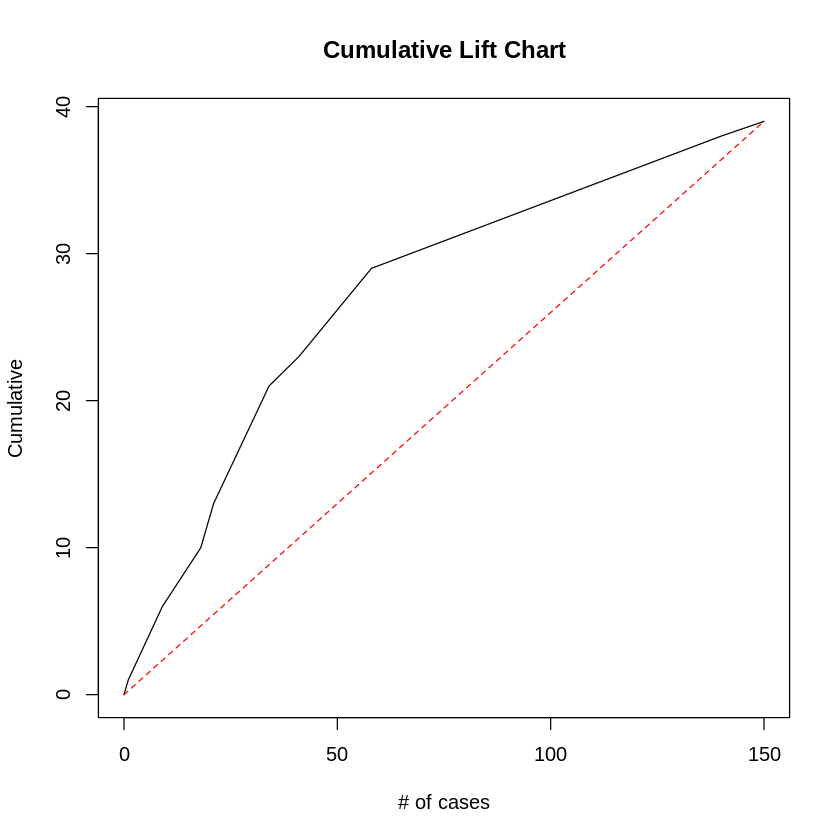

Setting levels: control = 0, case = 1

Setting direction: controls < cases



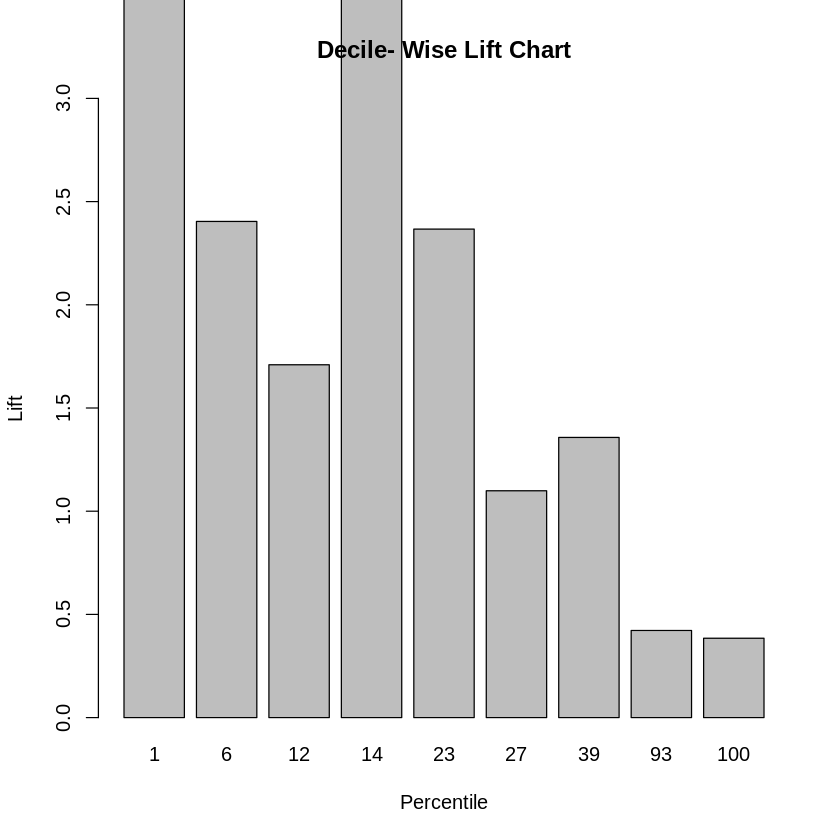

Area under the curve: 0.7677

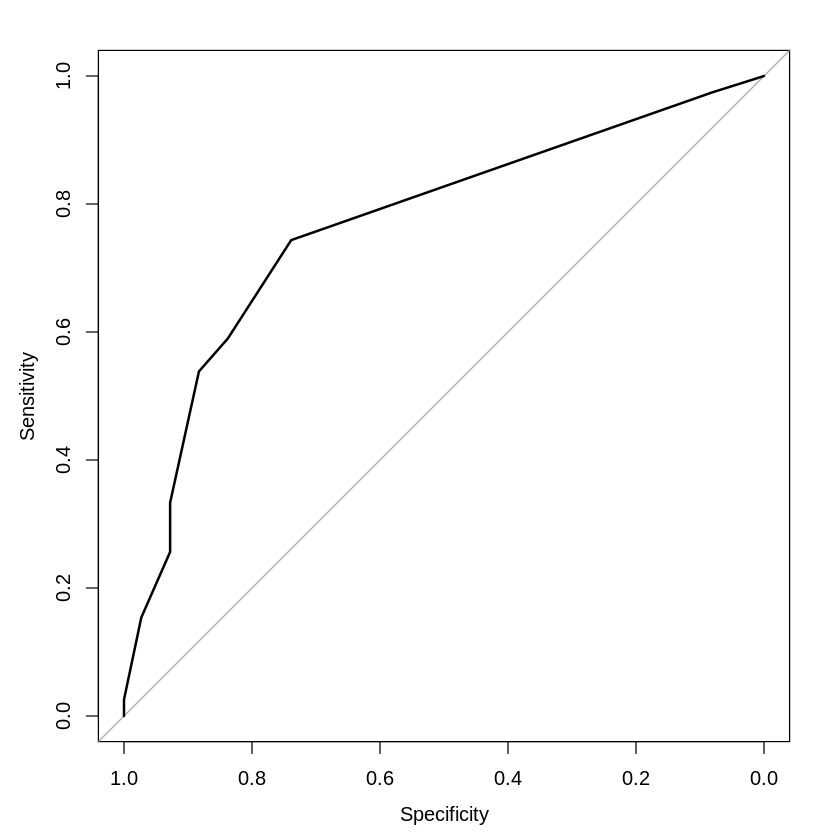

In [28]:
plot(c(0, gains_table$cume.pct.of.total*sum(validationSet$HELOC)) ~ c(0, gains_table$cume.obs), xlab = "# of cases", ylab = "Cumulative", main= "Cumulative Lift Chart", type ="l")
lines(c(0, sum(validationSet$HELOC)) ~ c(0, dim(validationSet)[1]), col = "red", lty=2)
barplot(gains_table$mean.resp/mean(validationSet$HELOC), names.arg=gains_table$depth, xlab = "Percentile", ylab= "Lift", ylim=c(0,3), main = "Decile- Wise Lift Chart")
roc_object<- roc(validationSet$HELOC, predicted_prob[,2])
plot.roc(roc_object)
auc(roc_object)

Sunnyville Bank can
reach a larger portion of potential customers who will actually
respond to the HELOC offer by targeting a smaller percentage
of the potential customers with the highest predicted probability
of responding to the offer.

If Sunnyville Bank sends offers to the top
14% of the potential customers with the highest predicted
probability of responding to a HELOC offer, it would be able to
capture twice as many individuals who actually respond to the
HELOC offer as compared to if 14% of the customers are
randomly selected.

Finally, to score the 20 new cases, we import the data from the
HELOC_Score worksheet of the HELOC data file into a data
frame (table) called myScoreData and use the predict function
to produce the predicted class memberships and probabilities
for the new cases using our classification tree.

In [34]:
myScoreData <- read_excel("/content/HELOC.xlsx", sheet = "HELOC_Score")

predicted_class_score <- predict(pruned_tree, myScoreData, type = "class")
predicted_class_score

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 
 0  0  0  0  0  0  0  0  0  0  1  0  0  1  1  0  1  1  0  1 
Levels: 0 1

In [35]:
predicted_class_prob <- predict(pruned_tree, myScoreData, type = "prob")
predicted_class_prob

,0,1
1,0.9381443,0.06185567
2,1.0000000,0.00000000
3,0.9381443,0.06185567
4,0.9381443,0.06185567
5,0.6666667,0.33333333
6,0.9381443,0.06185567
7,1.0000000,0.00000000
8,1.0000000,0.00000000
9,1.0000000,0.00000000
10,0.9381443,0.06185567
